# Customer Churn Prediction for a Telecom Provider Using XGBoost
##  Objective  
The goal of this project was to build a predictive model to identify customers likely to churn, enabling proactive retention strategies for a telecom provider.

---

##  Methodology

- **Initial Model**  
  Started with *Logistic Regression* as a baseline. After evaluating its performance, it was found to be insufficient for capturing complex churn patterns.

- **Final Model**  
  Implemented *XGBoost Classifier*, a powerful gradient boosting algorithm known for handling structured data and imbalanced classes effectively.

- **Hyperparameter Tuning**  
  Used `GridSearchCV` to optimize key parameters such as `max_depth`, `learning_rate`, `n_estimators`, and `subsample`, resulting in improved model accuracy.


##  Model Performance

- **Best Cross-Validated Accuracy**: `75.00%`  
- **Test Set Accuracy**: `68.33%`
- the Model Does Well at predicting churn on Customer Category 2.0 (E-Service) and 3.0 (Plus Service): The   predicted churn distribution closely matches the actual churn
- the Model Struggles : Customer Category 1.0 (Basic Service): The model seems to overpredict churn—it       shows more churned customers than actually exist. This could mean it's too sensitive to features common    in this group, when in reality these customers are more loyal.


##  Churn Insights by Customer Category

- **Category 1.0 (Basic Service)**  
  High predicted churn, aligned with actual data. Customers in this group have short tenure and limited service usage—churn is expected.

- **Category 3.0 (Plus Service)**  
  Balanced predictions and low churn rates. These customers appear more loyal and satisfied with their service level.

- **Category 4.0 (Total Service)**  
  Surprisingly high churn despite being premium users. Analysis revealed limited service usage and short tenure, suggesting dissatisfaction with service quality.

 ## diagnostically
 - Unexpectedly, Customer Category 4.0 (Total Service)– has limited use of services (longmon, tollmon,loglong , etc.), which is not expected
   given the high category segmentation and the presence of internet, e-bill, and equipment
   features among these customers. They might be leaving due to problems with the service
   or dissatisfaction with its quality. Their short tenure (number of months the customer
   has been with the company) could support this.
 - In the same context, Category 1.0 (Basic Service):– has limited use of services, but this is totally normal and expected based on the short
   subscription period (tenure) and the lower usage of services compared to the other three
   classifications

   
###  Business Actions
-  Investigate Category 4.0 Churn Causes These are high-value customers with unexpectedly low usage. Consider surveying them or analyzing service complaints, tenure, and satisfaction scores.

- Reinforce loyalty for Category 3.0 Since Plus Service customers show loyalty, reinforce it with targeted retention offers or upsell strategies.

- Monitor Category 1.0 Behavior Closely Basic Service users churn frequently, but that’s expected. Focus on onboarding and early engagement to extend tenure and reduce early exits
-----------------------------------------------------------------------------------------------------------------------------------------------------------------



installing required packages

In [1]:
!pip install scikit-learn
!pip install seaborn
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


importing required libraries

In [35]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
import seaborn as sns

import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

## Readind data 

In [36]:
data = pd.read_csv("ChurnData (1).csv")
data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.1,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.0,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


<div style="max-height:300px; overflow-y:auto; border:1px solid #ccc; padding:10px;">

                                  Dataset colums demonstration   

</div>



<div style="max-height:300px; overflow-y:auto; border:1px solid #ccc; padding:10px;">

| Column      | Meaning |
|-------------|---------|
| **tenure**  | Number of months the customer has been with the company |
| **age**     | Customer’s age |
| **address** | Number of years the customer has lived at their current address |
| **income**  | Annual income of the customer |
| **ed**      | Education level (numeric code, e.g., 1 = less, 5 = higher education) |
| **employ**  | Number of years the customer has been employed |
| **equip**   | Whether the customer owns the company’s equipment (1 = yes, 0 = no) |
| **callcard**| Whether the customer has a calling card service (1 = yes, 0 = no) |
| **wireless**| Whether the customer has a wireless service (1 = yes, 0 = no) |
| **longmon** | Average monthly long-distance charges |
| **tollmon** | Average monthly toll-free charges |
| **equipmon**| Average monthly equipment charges |
| **cardmon** | Average monthly calling card charges |
| **wiremon** | Average monthly wireless charges |
| **longten** | Total long-distance charges over tenure |
| **tollten** | Total toll-free charges over tenure |
| **cardten** | Total calling card charges over tenure |
| **voice**   | Whether the customer has voicemail service (1 = yes, 0 = no) |
| **pager**   | Whether the customer has a pager service (1 = yes, 0 = no) |
| **internet**| Whether the customer has internet service (1 = yes, 0 = no) |
| **callwait**| Whether the customer has call waiting (1 = yes, 0 = no) |
| **confer**  | Whether the customer has conference calling (1 = yes, 0 = no) |
| **ebill**   | Whether the customer uses electronic billing (1 = yes, 0 = no) |
| **loglong** | Log-transformed long-distance charges (used for normalization) |
| **logtoll** | Log-transformed toll-free charges |
| **lninc**   | Log-transformed income |
| **custcat** | Customer category (categorical segmentation, e.g., 1–4 groups) |
| **churn**   | Target variable: whether the customer churned (1 = yes, 0 = no) |

</div>



checking data information(null values, counts, data types )

In [37]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

general info about the data

### Understanding relationships and feature selection

correlating the data set features with churn

In [38]:
data_corr = data.corr()['churn'].drop('churn')
data_corr

tenure     -0.376860
age        -0.287697
address    -0.260659
income     -0.090790
ed          0.216112
employ     -0.337969
equip       0.275284
callcard   -0.311451
wireless    0.174356
longmon    -0.292026
tollmon     0.014356
equipmon    0.255348
cardmon    -0.177163
wiremon     0.177483
longten    -0.294906
tollten    -0.059482
cardten    -0.228634
voice       0.142315
pager       0.124623
internet    0.254838
callwait   -0.052885
confer     -0.081361
ebill       0.254838
loglong    -0.336869
logtoll    -0.070156
lninc      -0.117459
custcat     0.014839
Name: churn, dtype: float64

<div style="max-height:300px; overflow-y:auto; border:1px solid #ccc; padding:10px;">

sorting correlation values: with the strong posative corrleation in the top, and the strong negative in the bottom

</div>

In [39]:
data_corrs = data_corr.sort_values(ascending=False)
print(data_corrs)

equip       0.275284
equipmon    0.255348
internet    0.254838
ebill       0.254838
ed          0.216112
wiremon     0.177483
wireless    0.174356
voice       0.142315
pager       0.124623
custcat     0.014839
tollmon     0.014356
callwait   -0.052885
tollten    -0.059482
logtoll    -0.070156
confer     -0.081361
income     -0.090790
lninc      -0.117459
cardmon    -0.177163
cardten    -0.228634
address    -0.260659
age        -0.287697
longmon    -0.292026
longten    -0.294906
callcard   -0.311451
loglong    -0.336869
employ     -0.337969
tenure     -0.376860
Name: churn, dtype: float64


<div style="max-height:300px; overflow-y:auto; border:1px solid #ccc; padding:10px;">

Identify the top features with the most effect on the customer_churn.

</div>


In [40]:
print("features with a strong postive correlation significantly with churn")
print(data_corrs.head(6))
print("-------------------------------------------------------------------")
print("features with a strong negative correlation with churn")
print(data_corrs.tail(6))

features with a strong postive correlation significantly with churn
equip       0.275284
equipmon    0.255348
internet    0.254838
ebill       0.254838
ed          0.216112
wiremon     0.177483
Name: churn, dtype: float64
-------------------------------------------------------------------
features with a strong negative correlation with churn
longmon    -0.292026
longten    -0.294906
callcard   -0.311451
loglong    -0.336869
employ     -0.337969
tenure     -0.376860
Name: churn, dtype: float64


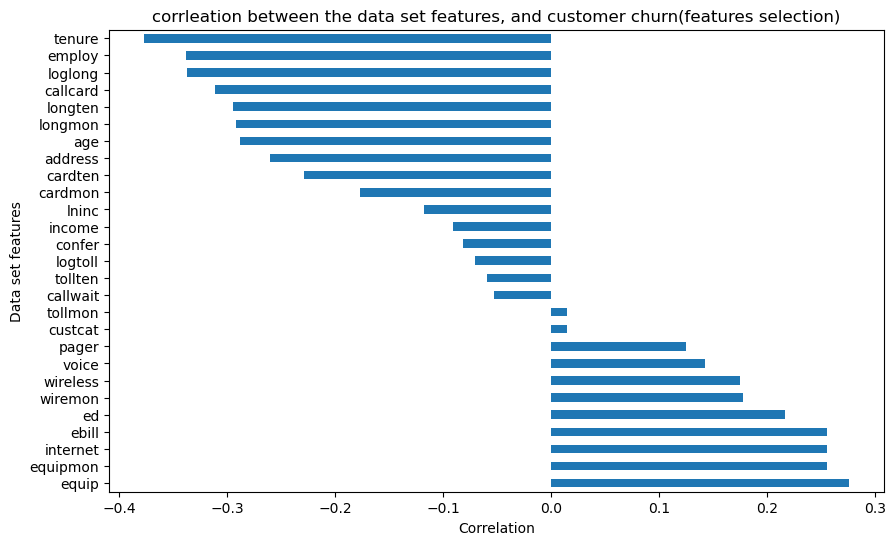

In [82]:
data_corrs.plot(kind = 'barh', figsize=(10, 6))

plt.title('corrleation between the data set features, and customer churn(features selection)')
plt.xlabel('Correlation')
plt.ylabel('Data set features')
plt.show()



-------------------------------------------------------------------------------------------------------------------------

## Preprocessing the data

### Feature scaling


In [43]:

pd.set_option('display.max_columns', 28)

# Show the first 5 rows with all 28 columns
print(data.head(5))


   tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0    11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2    23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4     7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   

   longmon  tollmon  equipmon  cardmon  wiremon  longten  tollten  cardten  \
0     4.40    20.75       0.0    15.25     35.7    42.00   211.45    125.0   
1     9.45     0.00       0.0     0.00      0.0   288.80     0.00      0.0   
2     6.30     0.00       0.0     0.00      0.0   157.05     0.00      0.0   
3     6.05    45.00      50.1    23.25     64.9   239.55  1873.05    880.0   
4     7.10    22.00       0.0    23.75      0.0    47.45   166.10    145.0   

   voice  pager  internet  callwait  confer  ebill  loglong  logtoll  lnin

In [44]:
continuous_fea = data[['tenure','age','income','longmon','logtoll','cardmon','employ','equipmon','wiremon','cardten','loglong','lninc','tollmon','longten','tollten']]

scaler = StandardScaler()
scaled_featuers = scaler.fit_transform(continuous_fea)

#convert the scaled data to a data frame
scaled_df = pd.DataFrame(scaled_featuers, columns=continuous_fea.columns)

#join the to data set
scaled_data = pd.concat([data.drop(['tenure','age','income','longmon','logtoll','cardmon','employ','equipmon','wiremon','cardten','loglong','lninc','tollmon','longten','tollten'],axis =1),scaled_df], axis = 1)


In [45]:
scaled_data.head()

,address,ed,equip,callcard,wireless,voice,pager,internet,callwait,confer,ebill,custcat,churn,tenure,age,income,longmon,logtoll,cardmon,employ,equipmon,wiremon,cardten,loglong,lninc,tollmon,longten,tollten
0,7.0,5.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,4.0,1.0,-1.135184,-0.625955,0.475142,-0.749227,-0.699872,0.060447,-0.584778,-0.809059,1.088262,-0.559744,-0.975096,1.281504,0.481266,-0.719407,-0.361328
1,12.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.116043,-0.625955,-0.328861,-0.237186,0.038582,-0.973853,-1.144375,-0.809059,-0.566167,-0.692848,0.072267,-0.604814,-0.848463,-0.388016,-0.619832
2,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,-0.579289,-0.855944,-0.352278,-0.556578,0.038582,-0.973853,-0.920536,-0.809059,-0.566167,-0.692848,-0.482945,-0.732700,-0.848463,-0.564923,-0.619832
3,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,0.0,0.115580,-0.472629,0.006791,-0.581926,2.061302,0.603031,-0.025182,1.759098,2.441464,0.244205,-0.539152,0.506195,2.035286,-0.454146,1.670029
4,14.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,-1.320483,-0.472629,0.038015,-0.475463,-0.492962,0.636942,0.534415,-0.809059,-0.566167,-0.538448,-0.319809,0.574135,0.561370,-0.712089,-0.416770



-------------------------------------------------------------------------------------------------------------------------

## Model development
    
-------------------------------------------------------------------------------------------------------------------------

In [46]:
x = scaled_data[['equip','equipmon','internet','ebill','wiremon','longmon','longten','callcard','loglong','employ','tenure','cardten','address','age','custcat','pager']]
y= scaled_data['churn']

In [47]:
x_trainset,x_testset, y_trainset,y_testset = train_test_split(x,y, test_size = 0.3, random_state=32)

In [48]:
logRModel = LogisticRegression(solver='lbfgs', max_iter=1000)

In [49]:
logRModel.fit(x_trainset, y_trainset)

LogisticRegression(max_iter=1000)

In [50]:
logRM_pre = logRModel.predict(x_testset)

<div style="max-height:300px; overflow-y:auto; border:1px solid #ccc; padding:10px;">

Logistic regression was chosen due to its interpretability and effectiveness in binary classification tasks

</div>



<div style="max-height:300px; overflow-y:auto; border:1px solid #ccc; padding:10px;">

the data has many features not well-scaled so using lbfgs solver : best for meduium data set and work in cases.
</div>


-------------------------------------------------------------------------------------------------------------------------

## Model Evaluation

-------------------------------------------------------------------------------------------------------------------------

In [51]:
print(f"accuarcy: {np.round(100*accuracy_score(y_testset,logRM_pre),2)}%")

accuarcy: 66.67%


visualzing model accuarcy with coffusion matrix

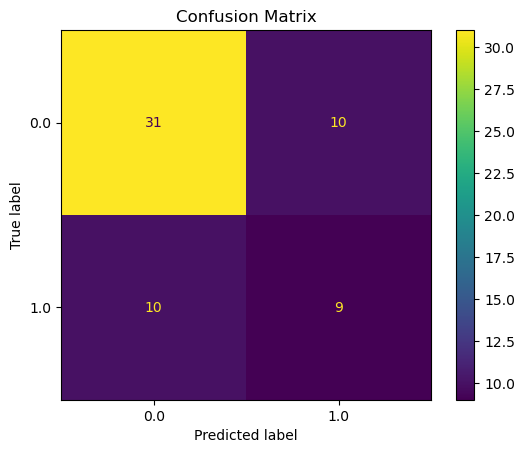

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logRModel, x_testset, y_testset)
plt.title('Confusion Matrix')
plt.show()





-------------------------------------------------------------------

### Model Refitting selecting all features to test accuracy



In [54]:
X = scaled_data.drop('churn',axis=1)
Y= scaled_data['churn']

In [55]:
X_trainset,X_testset, Y_trainset,Y_testset = train_test_split(X,Y, test_size = 0.3, random_state=32)

In [56]:
logRModel1 = LogisticRegression(solver='lbfgs', max_iter=1000)

In [57]:
logRModel1.fit(X_trainset,Y_trainset)

LogisticRegression(max_iter=1000)

In [58]:
logRM1_pre = logRModel1.predict(X_testset)

In [59]:
print(f"accuarcy score: {np.round(100*accuracy_score(Y_testset,logRM1_pre),2)}%")

accuarcy score: 65.0%


<div style="max-height:300px; overflow-y:auto; border:1px solid #ccc; padding:10px;">


      This means feature selection was successful but, lets try another model to predict our customer churn.

      
</div>

Tuning Logistic Regression Hyperparameters

In [60]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],             
    'penalty': ['l1', 'l2'],                   
    'solver': ['liblinear', 'saga'],         
    'max_iter': [1000, 1500, 2000]           
}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_trainset, Y_trainset)

print("Best parameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_ ,"%")

Best parameters: {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy: 0.75 %


<div style="max-height:300px; overflow-y:auto; border:1px solid #ccc; padding:10px;">


parameters (C), with solver ('liblinear') provide the best fit for the data
      
</div>

## Using a different model

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_trainset, Y_trainset)

xgbrm_pred = xgb_clf.predict(X_testset)


In [63]:
accuracy = accuracy_score(Y_testset, xgbrm_pred)

print(f"Model Accuracy: {accuracy:.3f}")

Model Accuracy: 0.683


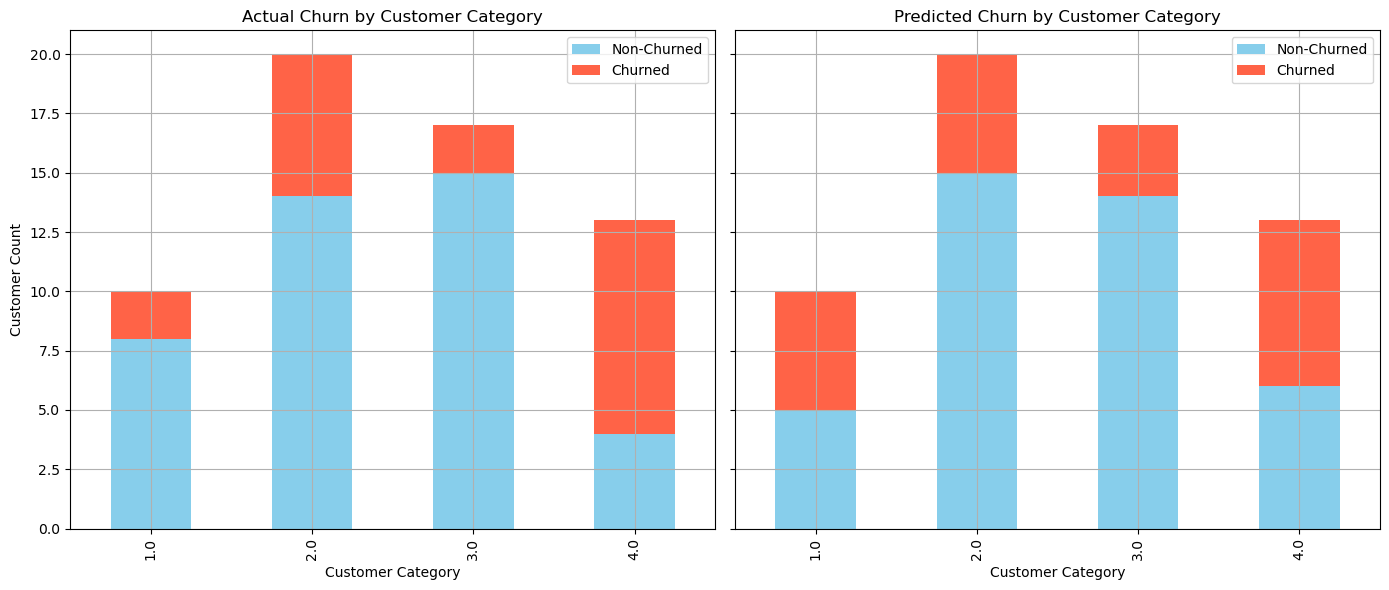

In [64]:

# Combine actual, predicted, and customer category
results_df = pd.DataFrame({
    'ActualChurn': Y_testset,
    'PredictedChurn': xgbrm_pred,
    'CustomerCategory': X_testset['custcat']
})

# Count actual churns by category
actual_churn = results_df.groupby(['CustomerCategory', 'ActualChurn']).size().unstack(fill_value=0)
predicted_churn = results_df.groupby(['CustomerCategory', 'PredictedChurn']).size().unstack(fill_value=0)

# Plot side-by-side stacked bars
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Actual churn
actual_churn.plot(kind='bar', stacked=True, ax=axes[0], color=['skyblue', 'tomato'])
axes[0].set_title('Actual Churn by Customer Category')
axes[0].set_xlabel('Customer Category')
axes[0].set_ylabel('Customer Count')
axes[0].legend(['Non-Churned', 'Churned'])
axes[0].grid(True)

# Predicted churn
predicted_churn.plot(kind='bar', stacked=True, ax=axes[1], color=['skyblue', 'tomato'])
axes[1].set_title('Predicted Churn by Customer Category')
axes[1].set_xlabel('Customer Category')
axes[1].legend(['Non-Churned', 'Churned'])
axes[1].grid(True)

plt.tight_layout()
plt.show()


<div style="max-height:300px; overflow-y:auto; border:1px solid #ccc; padding:10px;">
    
- the Model Does Well at predicting churn on
  Customer Category 2.0 (E-Service) and 3.0 (Plus Service): The 
  predicted churn distribution closely matches the actual churn
    
- the Model Struggles : Customer Category 1.0 (Basic Service):       The model seems to overpredict churn—it shows more churned         customers than actually exist. This could mean it's too            sensitive to features common in this group,
  when in reality these customers are more loyal.

</div>

### Improve XGB Model accuracy

run  GridSearchCV to Turn Hyperparameter, and extract the best estimator.

In [65]:

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_trainset, Y_trainset)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [71]:
best_model = grid.best_estimator_
print("Best Estimator:\n", best_model)

best_params = grid.best_params_
print("Best Parameters:\n", best_params)

best_score = grid.best_score_
print(f"Best Cross-Validated Accuracy: {best_score:.4f}")


Best Estimator:
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)
Best Parameters:
 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validated Accuracy: 0.7500


In [72]:
xgb_best_pred = best_model.predict(X_testset)

In [73]:
print("Test Accuracy:", accuracy_score(Y_testset, xgb_best_pred))

Test Accuracy: 0.7


Confusion Matrix on XGB model

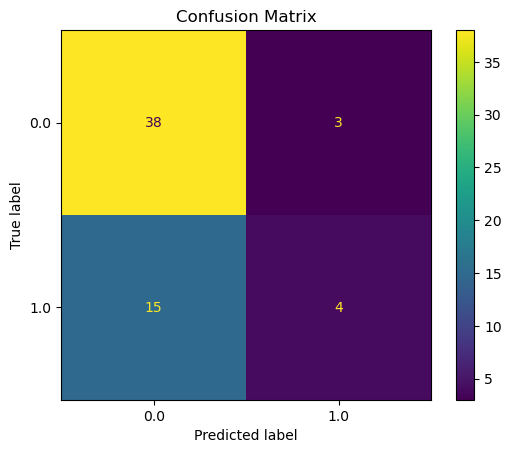

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(grid ,X_testset, Y_testset)
plt.title('Confusion Matrix')
plt.show()


<div style="max-height:300px; overflow-y:auto; border:1px solid #ccc; padding:10px;">


The model works dose in predicting the true(positive 1, and 0 negative) churners.

</div>

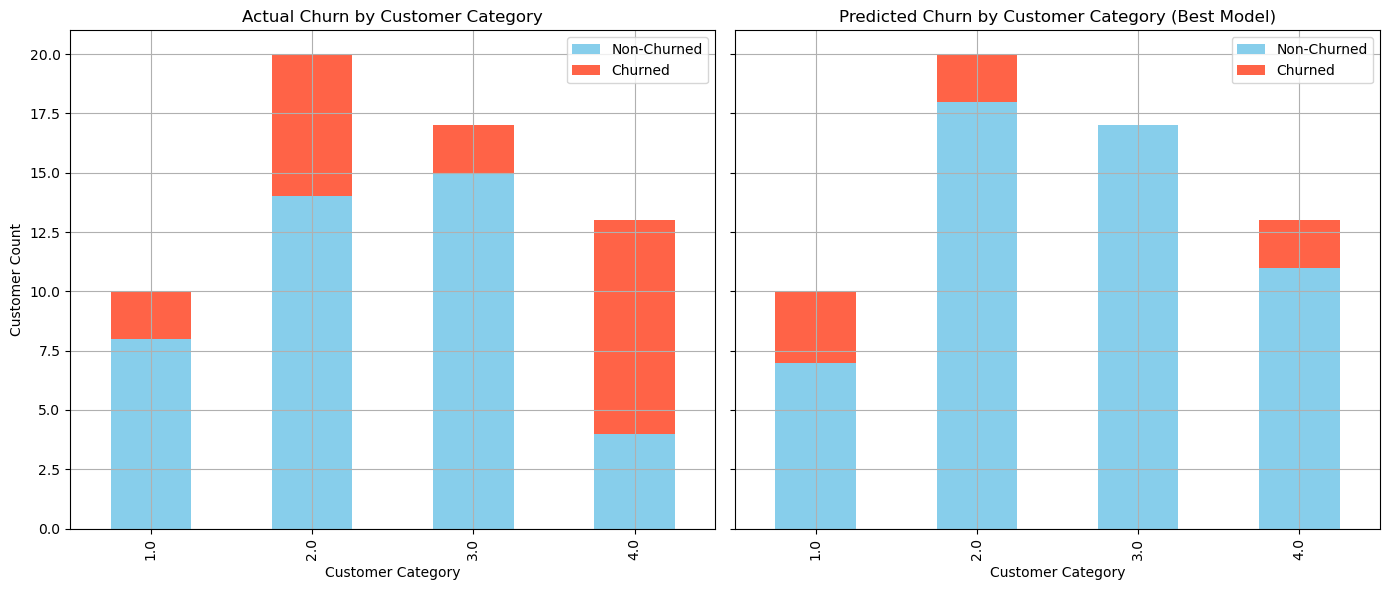

In [74]:
# Predict using the best model from GridSearchCV
xgb_best_pred = grid.predict(X_testset)

# Combine actual, predicted, and customer category
results_df = pd.DataFrame({
    'ActualChurn': Y_testset,
    'PredictedChurn': xgb_best_pred,
    'CustomerCategory': X_testset['custcat']
})

# Count actual churns by category
actual_churn = results_df.groupby(['CustomerCategory', 'ActualChurn']).size().unstack(fill_value=0)
predicted_churn = results_df.groupby(['CustomerCategory', 'PredictedChurn']).size().unstack(fill_value=0)

# Plot side-by-side stacked bars
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Actual churn
actual_churn.plot(kind='bar', stacked=True, ax=axes[0], color=['skyblue', 'tomato'])
axes[0].set_title('Actual Churn by Customer Category')
axes[0].set_xlabel('Customer Category')
axes[0].set_ylabel('Customer Count')
axes[0].legend(['Non-Churned', 'Churned'])
axes[0].grid(True)

# Predicted churn
predicted_churn.plot(kind='bar', stacked=True, ax=axes[1], color=['skyblue', 'tomato'])
axes[1].set_title('Predicted Churn by Customer Category (Best Model)')
axes[1].set_xlabel('Customer Category')
axes[1].legend(['Non-Churned', 'Churned'])
axes[1].grid(True)

plt.tight_layout()
plt.show()


<div style="max-height:300px; overflow-y:auto; border:1px solid #ccc; padding:10px;">

# Insights from the Predicted Churn Chart

-The model predicts that customers in Category 1.0 (Basic Service) and Category 4.0 (Total Service) are     more likely to churn.

-For Category 3.0 (Plus Service), the predictions are more balanced and closely aligned with the actual     churn data. These customers appear to be more loyal compared to those in Basic and Total Service           categories.

-In Category 4.0 (Total Service), the model also predicts a significant churn rate. These are typically     high-value customers, and the prediction seems accurate given the high actual churn rate observed in this  group.

</div>

Descriptive Statistics by Category

In [75]:

X_testset_copy = X_testset.copy()
X_testset_copy['custcat'] = X_testset['custcat']
X_testset_copy['churn'] = Y_testset

grouped = X_testset_copy.groupby('custcat').mean()
print(grouped)


           address        ed     equip  callcard  wireless     voice  \
custcat                                                                
1.0       8.100000  3.200000  0.200000  0.400000  0.200000  0.300000   
2.0      14.200000  3.250000  0.700000  0.600000  0.100000  0.200000   
3.0      14.294118  2.176471  0.294118  0.823529  0.058824  0.117647   
4.0       9.384615  3.307692  0.923077  0.923077  1.000000  0.923077   

            pager  internet  callwait    confer     ebill    tenure       age  \
custcat                                                                         
1.0      0.100000  0.400000  0.100000  0.100000  0.500000 -0.806280 -0.158309   
2.0      0.000000  0.550000  0.100000  0.150000  0.550000  0.432903  0.179009   
3.0      0.058824  0.352941  0.647059  0.823529  0.176471  0.052905  0.005389   
4.0      0.923077  0.769231  0.923077  0.769231  0.923077 -0.622050  0.075808   

           income   longmon   logtoll   cardmon    employ  equipmon   wiremon  \

<div style="max-height:300px; overflow-y:auto; border:1px solid #ccc; padding:10px;">

## diagnostically

- Unexpectedly, Customer Category 4.0 (Total Service)
  - has limited use of services (longmon, tollmon,loglong , etc.), which is not expected given the high       category segmentation and the presence of internet, e-bill, and equipment features among these             customers. They might be leaving due to problems with the service or dissatisfaction with its quality.     Their short tenure (number of months the customer has been with the company) could support this.

- In the same context, Category 1.0 (Basic Service):

  - has limited use of services, but this is totally normal and expected based on the short subscription       period (tenure) and the lower usage of services compared to the other three classifications.

      
</div>

<div style="max-height:300px; overflow-y:auto; border:1px solid #ccc; padding:10px;">

### Business Insight Recommendations
- Investigate Category 4.0 Churn Causes These are high-value customers with unexpectedly low usage.          Consider surveying them or analyzing service complaints, tenure, and satisfaction scores.

- Design Loyalty Programs for Category 3.0 Since Plus Service customers show loyalty, reinforce it with      targeted retention offers or upsell strategies.

- Monitor Category 1.0 Behavior Closely Basic Service users churn frequently, but that’s expected. Focus     on onboarding and early engagement to extend tenure and reduce early exits

</div>

### Comments and feedback are welcome.

###  Done By :
<a href="https://www.linkedin.com/in/almustafahamedtmony/" target="_blank">Almustafa Hamed</a>
